In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('C:\\Users\\chitt\\BTP_final_work\\Mtechproject\\MachineLearningModelDeployment\\PredictSales\IRIS.csv')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>

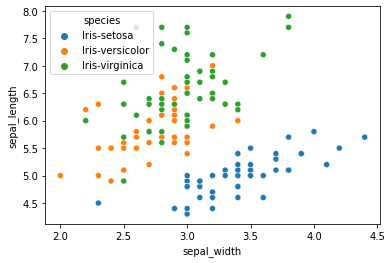

In [12]:
sns.scatterplot(x='sepal_width', y='sepal_length', hue='species', data=df)

In [13]:
X = df.drop('species', axis=1)

In [14]:
y = df['species']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [18]:
# Fitting Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
%%timeit
# Predictions
rf.predict(X_test.iloc[[0]])

5.61 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
# Predictions
rf_preds = rf.predict(X_test)
# Performance
print(accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))

1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [24]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
%%timeit
# Predictions
KNN.predict(X_test.iloc[[0]])

918 µs ± 139 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
# Predictions
KNN_preds = KNN.predict(X_test)
# Performance
print(accuracy_score(y_test, KNN_preds))
print(confusion_matrix(y_test, KNN_preds))

0.9333333333333333
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [27]:
# ====================================================================
# Random Forest Classifier: 1.00 accuracy on test set
# Shape of data : 150
# Prediction time on single input :5.61 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# ====================================================================
# ====================================================================
# KNN Classifier: 0.93 accuracy on test set
# Shape of data : 150
# ====================================================================
# Prediction time on single input :918 µs ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

In [29]:
import pickle 
pickle.dump(rf, open('model.pkl', 'wb'))